In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
# Import file
df = pd.read_csv('https://raw.githubusercontent.com/OscarG-DataSci/ADS-599B/main/Data%20Folder/new_elpac.csv')

### Multiple Linear Regression

In [3]:
# Drop columns whose p value is too high after viewing summary for OverallScoreStd
mlr_df = df.copy()

mlr_df.drop(mlr_df.columns[[8, 3, 13, 5, 2, 6, 12, 11, 10, 15, 7, 18, 20]], axis=1, inplace=True) # .64 R-Squared
mlr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9460 entries, 0 to 9459
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   School_deID        9460 non-null   int64  
 1   GradeLevel         9460 non-null   int64  
 2   Special_Education  9460 non-null   int64  
 3   OverallLevel       9460 non-null   int64  
 4   TeacherGender      9460 non-null   int64  
 5   TeacherEthnicity   9460 non-null   int64  
 6   OverallScoreStd    9460 non-null   float64
 7   TestInstance       9460 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 591.4 KB


In [4]:
X = mlr_df.loc[ : , mlr_df.columns != 'OverallScoreStd']
y = mlr_df[['OverallScoreStd']]

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=700, test_size=0.30)
print(" X_train    y_train    X_test    y_test")
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

 X_train    y_train    X_test    y_test
(6622, 7) (6622, 1) (2838, 7) (2838, 1)


In [5]:
# Add constant
X = sm.add_constant(X)

# Run the model
mlr_model = sm.OLS(y, X).fit()

# View the model's summary
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        OverallScoreStd   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     2396.
Date:                Sun, 20 Nov 2022   Prob (F-statistic):               0.00
Time:                        01:27:57   Log-Likelihood:                 11770.
No. Observations:                9460   AIC:                        -2.352e+04
Df Residuals:                    9452   BIC:                        -2.347e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3073      0.003    100.713      0.000       0.301       0.313
School_deID           0.0018      0.000      7.097      0.000       0.001       0.002
GradeLevel            0.0139      0.000     31.194      0.000       0.013       0.015
Special_Education    -0.0182      0.002     -8.228      0.000      -0.023      -0.014
OverallLevel          0.0892      0.001    116.585      0.000       0.088       0.091
TeacherGender        -0.0139      0.003     -5.554      0.000      -0.019      -0.009
TeacherEthnicity      0.0013      0.000      3.782      0.000       0.001       0.002
TestInstance          0.0078      0.001     10.795      0.000       0.006       0.009
==============================================================================
Omnibus:                     2867.308   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26905.119
Skew:                          -1.181   Prob(JB):                         0.00
Kurtosis:                      10.917   Cond. No.                         33.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Multiple Linear Regression - Coefficient observations:
64% of the time...

* The school a student attends has the potential to affect an OverallScoreStd by as much as 1.8% and as little as less than 1%

* A student's grade level has the potential to affect an OverallScoreStd by as much as 8% and as little as 1%

* Special_Education = yes, has the potential to affect OverallScoreStd by negative 2%

* Each OverallLevel (1 to 4) carries the weight of nearly 10%

* Male Teachers can reduce a student's OverallScoreStd by 1% versus Female Teachers ( consider there is a bias in Female vs Male Teacher totals)

* TeacherEthnicity has the potential to affect an OverallScoreStd by as little as .001% and as much as  1% (1-7). Consider bias here as Hispanic (value = 3, 5,387 total) and White (value = 7, 3,137 total) are the top representations amongst 7 ethnicities.

* Each new TestInstance has the potential to affect an OverallScoreStd by 1% or as much as 4%

### Logistic Regression

<AxesSubplot:>

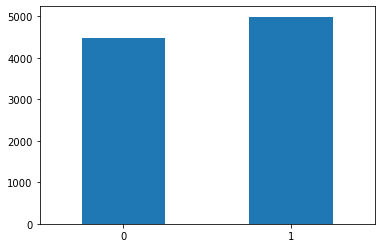

In [6]:
# Copy from main dataframe
lr_df = df.copy()

# Split OverallLevel in half, creating new feature to use as Target
lr_df['OverallLevelSplit'] = np.where(lr_df.OverallLevel == 1, 0, np.where(lr_df.OverallLevel == 2, 0, 1))

# Drop OverallLevel column
lr_df = lr_df.drop('OverallLevel', axis=1)

# Display the new target feature's balance
lr_df.OverallLevelSplit.value_counts().sort_index().plot(kind='bar', rot=0)

In [7]:
# Drop columns whose p value is too high after viewing summary for OverallLevelSplit
lr_df.drop(lr_df.columns[[13, 10, 17, 6, 2, 9, 3, 11, 7, 5, 15, 8, 1, 0]], axis=1, inplace=True) # .45 R-Squared
lr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9460 entries, 0 to 9459
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Special_Education           9460 non-null   int64  
 1   GradeAttendedPct            9460 non-null   float64
 2   TeacherTotalYearsOfService  9460 non-null   int64  
 3   OverallScoreStd             9460 non-null   float64
 4   TestInstance                9460 non-null   int64  
 5   Growth                      9460 non-null   int64  
 6   OverallLevelSplit           9460 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 517.5 KB


In [8]:
# Correlation for dummy variables for Overall Score
cor = pd.DataFrame(lr_df.corrwith(lr_df['OverallLevelSplit']))
cor.columns = ['Correlation']
cor.head(20).sort_values('Correlation', ascending=False).style.bar(align="mid", color=["red", "lightgreen"])

,Correlation
OverallLevelSplit,1.000000
OverallScoreStd,0.624314
Growth,0.334978
GradeAttendedPct,0.005508
TestInstance,-0.001480
TeacherTotalYearsOfService,-0.060857
Special_Education,-0.211801


In [9]:
X_lr = lr_df.loc[ : , lr_df.columns != 'OverallLevelSplit']
y_lr = lr_df[['OverallLevelSplit']]

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=700, test_size=0.30)
print(" X_train    y_train    X_test    y_test")
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

 X_train    y_train    X_test    y_test
(6622, 8) (6622, 1) (2838, 8) (2838, 1)


In [10]:
# Add constant
X_lr = sm.add_constant(X_lr)

# Run the model
lr_model = sm.OLS(y_lr, X_lr).fit()

# View the model's summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      OverallLevelSplit   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     1290.
Date:                Sun, 20 Nov 2022   Prob (F-statistic):               0.00
Time:                        01:27:58   Log-Likelihood:                -4021.4
No. Observations:                9460   AIC:                             8057.
Df Residuals:                    9453   BIC:                             8107.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.7882      0.023    -35.008      0.000      -0.832      -0.744
Special_Education             -0.1183      0.012    -10.071      0.000      -0.141      -0.095
GradeAttendedPct              -0.0256      0.002    -10.796      0.000      -0.030      -0.021
TeacherTotalYearsOfService    -0.0024      0.000     -5.411      0.000      -0.003      -0.002
OverallScoreStd                2.5452      0.036     70.428      0.000       2.474       2.616
TestInstance                  -0.0310      0.004     -7.891      0.000      -0.039      -0.023
Growth                         0.1292      0.006     23.050      0.000       0.118       0.140
==============================================================================
Omnibus:                     2491.427   Durbin-Watson:                   1.702
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              415.141
Skew:                          -0.002   Prob(JB):                     7.13e-91
Kurtosis:                       1.974   Cond. No.                         186.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Logistic Regression - Coefficient observations:
45% of the time...

Along with the constant, there are four additional features with negative coefficient values. High values in any of these will result in a lower OverallLevelSplit value:
1. Special_Education
2. GradeAttendedPct
3. TeacherTotalYearsOfService
4. TestInstance

Positive coefficient features are:
1. OverallScoreStd
2. Growth